In [2]:
import easyocr
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [10]:
image_path="/Users/prasanth/Desktop/ds_projects/Bizcard/uploaded_cards/1.png"

In [17]:
reader = easyocr.Reader(['en'])

result = reader.readtext(image_path)

result

[([[47, 113], [156, 113], [156, 157], [47, 157]], 'Selva', 0.823823395667278),
 ([[52, 158], [278, 158], [278, 190], [52, 190]],
  'DATA MANAGER',
  0.9991545310564058),
 ([[120, 224], [333, 224], [333, 254], [120, 254]],
  '+123-456-7890',
  0.5781001266077493),
 ([[120, 262], [330, 262], [330, 294], [120, 294]],
  '+123-456-7891',
  0.5840312401804757),
 ([[120, 318], [340, 318], [340, 350], [120, 350]],
  'WWW XYZI.com',
  0.5873198160900878),
 ([[119, 355], [359, 355], [359, 391], [119, 391]],
  'hello@XYZ1.com',
  0.8744069561061326),
 ([[121, 410], [411, 410], [411, 447], [121, 447]],
  '123 ABC St , Chennai;',
  0.44593976484944947),
 ([[725, 388], [908, 388], [908, 463], [725, 463]],
  'selva',
  0.9999293079731785),
 ([[119, 445], [379, 445], [379, 481], [119, 481]],
  'TamilNadu 600113',
  0.937799021906171),
 ([[694, 477], [942, 477], [942, 565], [694, 565]],
  'digitals',
  0.6976752537572961)]

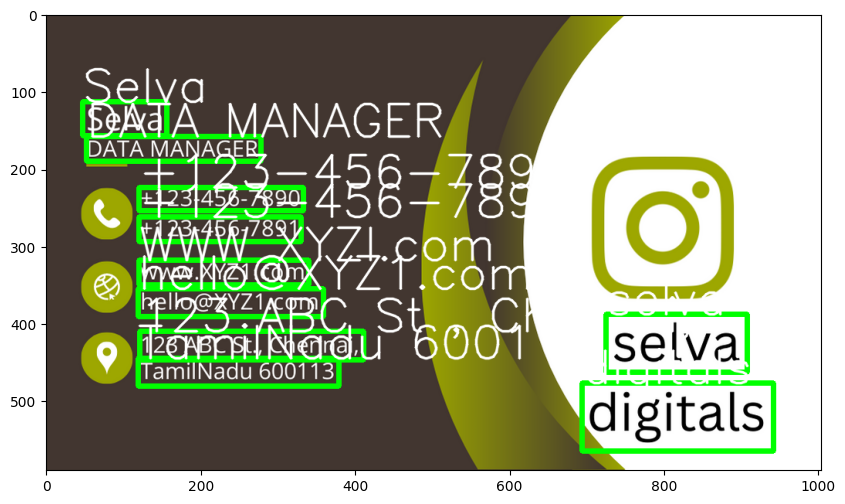

In [20]:
img=cv2.imread(image_path)
for detection in result:
    left=tuple([int(val) for val in detection[0][0]])
    right=tuple([int(val) for val in detection[0][2]])
    text=detection[1]
    font=cv2.FONT_HERSHEY_SIMPLEX
    img=cv2.rectangle(img,left,right,(0,255,0),5)
    img=cv2.putText(img,text,left,font,2,(255,255,255),2,cv2.LINE_AA)

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [ ]:
#streamlit page background setup
#page_bg_img='''
#<style>
#[data-testid="stAppViewContainer"]{
#        background-color:#F4C1E8;   
#}
#</style>'''

In [ ]:
#st.markdown(page_bg_img,unsafe_allow_html=True)
#st.divider()

In [ ]:
#    SELECT = option_menu(
#            menu_title = None,
#            options = ["About","Upload Image","Make Changes","Deletion"],
#            icons =["database","image","vector-pen","eraser"],
#            default_index=0,
#            orientation="horizontal",
#            styles={"container": {"padding": "0!important", "background-color": "white","size":"cover", "width": "100%"},
#                    "icon": {"color": "black", "font-size": "20px"},
#                    "nav-link": {"font-size": "20px", "text-align": "center", "margin": "-2px", "--hover-color": "#b0abac"},
#                    "nav-link-selected": {"background-color": "#b0abac"}})

In [ ]:
        def get_data(res):
            for ind, i in enumerate(res):
                
                # To get WEBSITE_URL
                if "www " in i.lower() or "www." in i.lower():
                    data["Website"].append(i)
                elif "WWW" in i:
                    data["Website"] = res[4] + "." + res[5]

                # To get EMAIL ID
                elif "@" in i:
                    data["Email"].append(i)
                    
                # To get MOBILE NUMBER
                elif "-" in i:
                    data["Phone_Number"].append(i)
                    if len(data["Phone_Number"]) == 2:
                        data["Phone_Number"] = " & ".join(data["Phone_Number"])
                # To get COMPANY NAME
                elif ind == len(res) - 1:
                    data["Company_Name"].append(i)

                # To get CARD HOLDER NAME
                elif ind == 0:
                    data["Card_Holder_Name"].append(i)
                    
                # To get DESIGNATION
                elif ind == 1:
                    data["Designation"].append(i)
                    
                # To get AREA
                if re.findall('^[0-9].+, [a-zA-Z]+', i):
                    data["Area"].append(i.split(',')[0])
                elif re.findall('[0-9] [a-zA-Z]+', i):
                    data["Area"].append(i)
                
                # To get CITY NAME
                match1 = re.findall('.+St , ([a-zA-Z]+).+', i)
                match2 = re.findall('.+St,, ([a-zA-Z]+).+', i)
                match3 = re.findall('^[E].*', i)
                if match1:
                    data["City"].append(match1[0])
                elif match2:
                    data["City"].append(match2[0])
                elif match3:
                    data["City"].append(match3[0])
                    
                # To get STATE
                state_match = re.findall('[a-zA-Z]{9} +[0-9]', i)
                if state_match:
                    data["State"].append(i[:9])
                elif re.findall('^[0-9].+, ([a-zA-Z]+);', i):
                    data["State"].append(i.split()[-1])
                if len(data["State"]) == 2:
                    data["State"].pop(0)

                # To get PINCODE
                if len(i) >= 6 and i.isdigit():
                    data["Pincode"].append(i)
                elif re.findall('[a-zA-Z]{9} +[0-9]', i):
                    data["Pincode"].append(i[10:])